OSIsoft Cloud Services interpolation and extrapolation example with stream views

Requirements:
1. Juptyer notebook or lab
2. Python
3. ocs_sample_library
   https://github.com/osisoft/OSI-Samples/tree/master/ocs_samples/library_samples/Python3
   Note: this notebook uses a customized version of the Python library, some of these features are not yet in the github library.
4. config.ini configured for your OSIsoft Cloud Services environment
   https://github.com/osisoft/OSI-Samples/tree/master/ocs_samples/basic_samples/SDS/Python/SDSPy/Python3
5. Familiarity with namespaces, types and streams,  see https://cloud.osisoft.com

Objectives:
1. Create types, stream, stream views
2. Use the stream views to show interpolation and extrapolation

In [1]:
# specify a unique prefix to create objects, suggestion use your nickname
example_prefix = 'SDSpolation1.'

# run a fork-ed/edited version of the OSIsoft Python library to support *polation
custom_ocs_library = True
   
# setup the environment, using statements defined in a python script file   
%run -i setup

Create a type

In [2]:
# Dictionary to describe information about the type
thetype = {'sdstypecode': SdsTypeCode.Object, # type of SDS object
           'id': f'{example_prefix}default', # unique identifier for the stream
           'name': 'bearing_channel', # descritive name
           'description': 'bearing vibration signals'}

# data type
double_type = SdsType()
double_type.Id = "Double"
double_type.SdsTypeCode = SdsTypeCode.Double

# sds type property
timestamp_property = SdsTypeProperty()
timestamp_property.Id = "timestamp"
timestamp_property.SdsType = SdsType.fromDictionary({"SdsTypeCode": SdsTypeCode.DateTime.value})
timestamp_property.IsKey = True

# sds type property
counter_property = SdsTypeProperty()
counter_property.Id = "counter"
counter_property.SdsType = SdsType.fromDictionary({"SdsTypeCode": SdsTypeCode.Decimal.value})

# sds type property
channel_property =  SdsTypeProperty()
channel_property.Id = "channel"
channel_property.SdsType = SdsType.fromJson({"SdsTypeCode" : SdsTypeCode.Double.value })

# sds type defintion
bearing = SdsType()
bearing.Id = thetype['id']
bearing.SdsTypeCode = thetype['sdstypecode']
bearing.Name = thetype['name']
bearing.Description=thetype['description']
bearing.Properties = [timestamp_property,counter_property,channel_property]

# Create the type
try:
    bearing_type = ocsClient.Types.getOrCreateType(namespace_id, bearing)
except:
    bearing_type = ocsClient.Types.getType(namespace_id,bearing.Id)
ocsClient.acceptverbosity = True  # return values that are default values. By default these are not returned
print(json.dumps(json.loads(bearing_type.toJson()), indent=4))

{
    "SdsTypeCode": 1,
    "Properties": [
        {
            "Id": "timestamp",
            "Description": null,
            "SdsType": {
                "SdsTypeCode": 16,
                "Id": null,
                "Name": null,
                "Description": null,
                "ExtrapolationMode": null,
                "InterpolationMode": null
            },
            "Value": null,
            "Order": null,
            "IsKey": true,
            "InterpolationMode": null,
            "Uom": null
        },
        {
            "Id": "counter",
            "Description": null,
            "SdsType": {
                "SdsTypeCode": 15,
                "Id": null,
                "Name": null,
                "Description": null,
                "ExtrapolationMode": null,
                "InterpolationMode": null
            },
            "Value": null,
            "Order": null,
            "IsKey": false,
            "InterpolationMode": null,
            "Uom": null


Create a second type, specifying the interpolation mode for the counter property

In [3]:
# for this step we just update/add to the previous type defintion to create the new type

thetype = {'sdstypecode': SdsTypeCode.Object, # type of SDS object
           'id': f'{example_prefix}1', # unique identifier for the stream
           'name': 'bearing_channel', # descritive name
           'description': 'bearing vibration signals - index stepwise'}

counter_property.InterpolationMode = SdsStreamMode.StepwiseContinuousLeading.value
bearing.Id = thetype['id']

try:
    bearing_type = ocsClient.Types.getOrCreateType(namespace_id, bearing)
except:
    bearing_type = ocsClient.Types.getType(namespace_id,bearing.Id)
ocsClient.acceptverbosity = True
print(json.dumps(json.loads(bearing_type.toJson()), indent=4))

{
    "SdsTypeCode": 1,
    "Properties": [
        {
            "Id": "timestamp",
            "Name": null,
            "Description": null,
            "SdsType": {
                "SdsTypeCode": 16,
                "Id": null,
                "Name": null,
                "Description": null,
                "ExtrapolationMode": 0,
                "InterpolationMode": 0
            },
            "Value": null,
            "Order": 0,
            "IsKey": true,
            "InterpolationMode": null,
            "Uom": null
        },
        {
            "Id": "counter",
            "Name": null,
            "Description": null,
            "SdsType": {
                "SdsTypeCode": 15,
                "Id": null,
                "Name": null,
                "Description": null,
                "ExtrapolationMode": 0,
                "InterpolationMode": 0
            },
            "Value": null,
            "Order": 0,
            "IsKey": false,
            "InterpolationMod

Create a third type, specifying the extrapolation mode for the type

In [4]:
# for this step we just update/add to the previous type defintion to create the new type

thetype = {'sdstypecode': SdsTypeCode.Object, # type of SDS object
           'id': f'{example_prefix}2', # unique identifier for the stream
           'name': 'bearing_channel', # descritive name
           'description': 'bearing vibration signals - extrapolation none'}

bearing.Id = thetype['id']
bearing.ExtrapolationMode = SdsStreamExtrapolation.Nonex.value

try:
    bearing_type = ocsClient.Types.getOrCreateType(namespace_id, bearing)
except:
    bearing_type = ocsClient.Types.getType(namespace_id,bearing.Id)
ocsClient.acceptverbosity = True
print(json.dumps(json.loads(bearing_type.toJson()), indent=4))

{
    "SdsTypeCode": 1,
    "Properties": [
        {
            "Id": "timestamp",
            "Name": null,
            "Description": null,
            "SdsType": {
                "SdsTypeCode": 16,
                "Id": null,
                "Name": null,
                "Description": null,
                "ExtrapolationMode": 0,
                "InterpolationMode": 0
            },
            "Value": null,
            "Order": 0,
            "IsKey": true,
            "InterpolationMode": null,
            "Uom": null
        },
        {
            "Id": "counter",
            "Name": null,
            "Description": null,
            "SdsType": {
                "SdsTypeCode": 15,
                "Id": null,
                "Name": null,
                "Description": null,
                "ExtrapolationMode": 0,
                "InterpolationMode": 0
            },
            "Value": null,
            "Order": 0,
            "IsKey": false,
            "InterpolationMod

In [5]:
# Create a streamview mapping from the first type created to the second type
sds_stream_view = SdsStreamView()
sds_stream_view.Name = f'{example_prefix}Stepwise'
sds_stream_view.Id = f'{example_prefix}Stepwise'
sds_stream_view.SourceTypeId = f'{example_prefix}default'  # first type created
sds_stream_view.TargetTypeId = f'{example_prefix}1'        # second type created
stream_view = ocsClient.Streams.getOrCreateStreamView(namespace_id,sds_stream_view)

In [6]:
# Create a streamview mapping from the first type created to the third type
sds_stream_view = SdsStreamView()
sds_stream_view.Name = f'{example_prefix}ExtraNone'
sds_stream_view.Id = f'{example_prefix}ExtraNone'
sds_stream_view.SourceTypeId = f'{example_prefix}default' # first type created
sds_stream_view.TargetTypeId = f'{example_prefix}2'       # third type created
stream_view = ocsClient.Streams.getOrCreateStreamView(namespace_id,sds_stream_view)

In [7]:
# Create a stream using the first type created
bearing = 1
type_suffix = "default"
# If you want to recreate/modify the dataset by deleting/re-creating the stream:
# ocsClient.Streams.deleteStream(namespace_id,f'{example_prefix}bearing{bearing}')
sds_stream = SdsStream(id=f'{example_prefix}bearing{bearing}',name=f'bearing{bearing}', description=f'Bearing {bearing} Channel 1', typeId=f'{example_prefix}{type_suffix}')
try:
    stream = ocsClient.Streams.getOrCreateStream(namespace_id,sds_stream)
except:
    stream = ocsClient.Streams.getStream(namespace_id,f'{example_prefix}bearing{bearing}')
print(f'id: {stream.Id}, name: {stream.Name}, type: {stream.TypeId}')
stream_id = stream.Id

id: SDSPolation1.bearing1, name: bearing1, type: SDSPolation1.default


In [8]:
# create stream events
values = [ {'timestamp': '2004-02-19T06:19:00Z', 'counter': 0, 'channel': -0.872},
           {'timestamp': '2004-02-19T06:21:00Z', 'counter': 1, 'channel': 0.002},
           {'timestamp': '2004-02-19T06:23:00Z', 'counter': 2, 'channel': -0.438},
           {'timestamp': '2004-02-19T06:25:00Z', 'counter': 3, 'channel': 0.222},
           {'timestamp': '2004-02-19T06:27:00Z', 'counter': 4, 'channel': 0.678}]
# insert values
try:
    ocsClient.Streams.insertValues(namespace_id,stream_id,json.dumps(values))
except:
    pass

In [9]:
# setup variables for use in queries
start_time = '2004-02-19T06:14:00Z'
end_time = '2004-02-19T06:30:00Z'
start_datetime = (datetime.datetime.strptime(start_time,"%Y-%m-%dT%H:%M:%SZ"))
end_datetime = (datetime.datetime.strptime(end_time,"%Y-%m-%dT%H:%M:%SZ"))
# If you want to see the web request uncomment the following two lines
#logger.setLevel(logging.DEBUG)
#logging.debug("tap")

                     counter  channel
timestamp                            
2004-02-19 06:14:00      0.0   -0.872
2004-02-19 06:18:00      0.0   -0.872
2004-02-19 06:22:00      1.5   -0.218
2004-02-19 06:26:00      3.5    0.450
2004-02-19 06:30:00      4.0    0.678


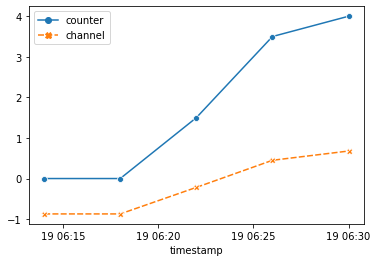

In [16]:
ocsClient.acceptverbosity = True  # return values that are default values.By default 
# these are not returned..
# query for interpolated data using the first type created
response = ocsClient.Streams.getRangeValuesInterpolated(namespace_id,
                                                        stream_id=stream_id,
                                                        value_class=None,
                                                        start=start_datetime,
                                                        end=end_datetime,
                                                        count=5)
# put it in a dataframe and display
df_result = pd.DataFrame.from_dict(response)
df_result['timestamp'] = pd.to_datetime(df_result['timestamp'],infer_datetime_format=True)
df_result.set_index('timestamp', inplace=True)
print(df_result)
ax = sns.lineplot(data=df_result,markers=True)

                     counter  channel
timestamp                            
2004-02-19 06:14:00      0.0   -0.872
2004-02-19 06:18:00      0.0   -0.872
2004-02-19 06:22:00      1.0   -0.218
2004-02-19 06:26:00      3.0    0.450
2004-02-19 06:30:00      4.0    0.678


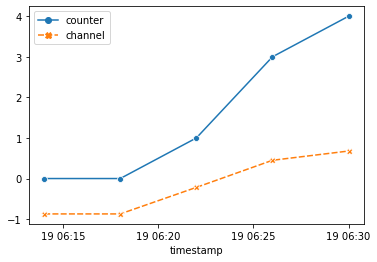

In [17]:
# query for an interpolated data using the stream view to map to the second type created which specifies stepwise interpolation for the counter property
response = ocsClient.Streams.getRangeValuesInterpolated(namespace_id,
                                                        stream_id=stream_id,
                                                        value_class=None,
                                                        start=start_datetime,
                                                        end=end_datetime,
                                                        count=5,
                                                        stream_view_id=f'{example_prefix}Stepwise')
# put it in a dataframe for exploring/displaying
df_stepwise = pd.DataFrame.from_dict(response)
df_stepwise['timestamp'] = pd.to_datetime(df_stepwise['timestamp'],infer_datetime_format=True)
df_stepwise.set_index('timestamp', inplace=True)
print(df_stepwise)
ax = sns.lineplot(data=df_stepwise,markers=True)

                     counter  channel
timestamp                            
2004-02-19 06:22:00      1.0   -0.218
2004-02-19 06:26:00      3.0    0.450


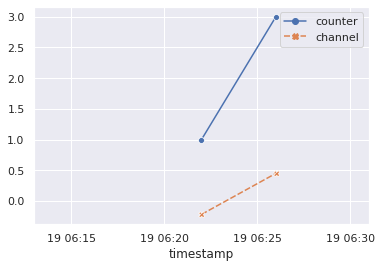

In [20]:
# query for an interpolated data using the stream view to map to the third type which specifies stepwise for counter and no extrapolation for the type
response = ocsClient.Streams.getRangeValuesInterpolated(namespace_id,stream_id=stream_id,value_class=None,start=start_datetime,end=end_datetime,count=5,stream_view_id=f'{example_prefix}ExtraNone')
# put it in a dataframe for exploring/displaying
df_extranone = pd.DataFrame.from_dict(response)
df_extranone['timestamp'] = pd.to_datetime(df_extranone['timestamp'],infer_datetime_format=True)
df_extranone.set_index('timestamp', inplace=True)
print(df_extranone)
ax = sns.lineplot(data=df_extranone,markers=True)
ax = plt.xlim(datetime.datetime(2004, 2, 19, 6, 13, 0),datetime.datetime(2004, 2, 19, 6, 31, 0))

Summary:

This is of course a contrived example....
Ideally you would create the third type only, which included the interpolation and extrapolation required!

Note that you can set interpolation and extrapolation settings:
1. Type definiton
    for the type
    for the property - interpolation only
    for the property data type - not done in this example
2. Stream definiton
    for the stream
    for a stream property - interpolation only
3. When querying using GET/read request

In [21]:
# display the three types
#ocsClient.acceptverbosity = False
#for sds_type in ('SDSPolation1.Default','SDSPolation1.1','SDSPolation1.2'):
#    bearing_type = ocsClient.Types.getType(namespace_id,sds_type)
#    print(json.dumps(json.loads(bearing_type.toJson()), indent=4))

In [ ]:
# Clean-up environment - delete type, stream and stream_view with {example_prefix} prefix defined earlier
# Note: don't do this if you plan to run subsequent notebooks in this "group"

def cleanup(run=False):
        for view in ocsClient.Streams.getStreamViews(namespace_id):
            if view.Id.startswith(example_prefix):
                print(f'stream view id: {view.Id}, stream view nanme: {view.Name}')
                if run:
                    try:
                        ocsClient.Streams.deleteStreamView(namespace_id,view.Id)
                    except:
                        pass
        for stream in ocsClient.Streams.getStreams(namespace_id,f'{example_prefix}*'):
            print(f'stream id: {stream.Id}, stream name: {stream.Name}')
            if run:
                try:
                    ocsClient.Streams.deleteStream(namespace_id,stream.Id)
                except:
                    pass
        for type in ocsClient.Types.getTypes(namespace_id,query=f'{example_prefix}*'):
            print(f'type id: {type.Id}, type name: {type.Name}')
            if run:
                try:
                    ocsClient.Types.deleteType(namespace_id,type.Id)
                    ocsClient.Types.deleteType(namespace_id,type.TypeId)
                except:
                    pass
        
# cleanup - disabled, i.e: False and commented:
#cleanup(False)